In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import duckdb
import plotly.express as px

In [2]:
path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'utils')))
if (not (path2add in sys.path)):
    sys.path.append(path2add)

In [3]:
from visualizations import bar_plot, pie_plot

In [4]:
data = pd.read_csv("../data/ph_jan_april_2024_processed.csv")

In [5]:
data.head()

,Name,Date,Description,Topic 1,Topic 2,Topic 3,URL,Upvotes,Pricing,Reviews,Product Rating,Comments,Day Rank,Week Rank,Product Rating Float,Date Formatted,Day,Num Topics,Pricing Codes
0,Polar Habits,2024-01-01,Build lasting habits without the guilt of brok...,Health & Fitness,Productivity,Quantified Self,https://www.producthunt.com/posts/polar-habits-2/,779,Free Options,14,4.5/5 ?,126,1,6,4.5,2024-01-01,Monday,3,1
1,socra,2024-01-01,Crush your goals with AI,Productivity,SaaS,Artificial Intelligence,https://www.producthunt.com/posts/socra/,331,Free,1,5/5 ?,68,2,18,5.0,2024-01-01,Monday,3,0
2,Heydai,2024-01-01,Know where your time goes,Task Management,Time Tracking,Calendar,https://www.producthunt.com/posts/heydai/,298,Free Options,4,5/5 ?,82,3,22,5.0,2024-01-01,Monday,3,1
3,Freelancer Stash,2024-01-01,The best tools & resources for freelancing,Design Tools,Freelance,Tech,https://www.producthunt.com/posts/freelancer-s...,235,Free,1,5/5 ?,54,4,29,5.0,2024-01-01,Monday,3,0
4,GPT Quiz Maker for Google Forms,2024-01-01,Make a quiz with AI and ChatGPT in just 1 click,Writing,Marketing,Artificial Intelligence,https://www.producthunt.com/posts/gpt-quiz-mak...,150,Free Options,0,0,38,5,40,0.0,2024-01-01,Monday,3,1


In [6]:
data.set_index("Name", inplace=True)

In [9]:
data.head()

,Date,Description,Topic 1,Topic 2,Topic 3,URL,Upvotes,Pricing,Reviews,Product Rating,Comments,Day Rank,Week Rank,Product Rating Float,Date Formatted,Day,Num Topics,Pricing Codes
Name,,,,,,,,,,,,,,,,,,
Polar Habits,2024-01-01,Build lasting habits without the guilt of brok...,Health & Fitness,Productivity,Quantified Self,https://www.producthunt.com/posts/polar-habits-2/,779,Free Options,14,4.5/5 ?,126,1,6,4.5,2024-01-01,Monday,3,1
socra,2024-01-01,Crush your goals with AI,Productivity,SaaS,Artificial Intelligence,https://www.producthunt.com/posts/socra/,331,Free,1,5/5 ?,68,2,18,5.0,2024-01-01,Monday,3,0
Heydai,2024-01-01,Know where your time goes,Task Management,Time Tracking,Calendar,https://www.producthunt.com/posts/heydai/,298,Free Options,4,5/5 ?,82,3,22,5.0,2024-01-01,Monday,3,1
Freelancer Stash,2024-01-01,The best tools & resources for freelancing,Design Tools,Freelance,Tech,https://www.producthunt.com/posts/freelancer-s...,235,Free,1,5/5 ?,54,4,29,5.0,2024-01-01,Monday,3,0
GPT Quiz Maker for Google Forms,2024-01-01,Make a quiz with AI and ChatGPT in just 1 click,Writing,Marketing,Artificial Intelligence,https://www.producthunt.com/posts/gpt-quiz-mak...,150,Free Options,0,0,38,5,40,0.0,2024-01-01,Monday,3,1


In [10]:
upvotes = duckdb.sql("SELECT Upvotes FROM data").df()

fig_upvotes = px.histogram(
    upvotes,
    x='Upvotes',
    marginal="box",
)

fig_upvotes.show()

**Observations:**
- For the columns `Upvotes`, `Reviews`, `Comments` there are extreme outliers present, where 75% of the data is less than 300, 5 and 80 respectively, the maximum value goes upto 900+.
- Minimum value is 0, but this represent real scenario of product launches, hence we focus of removing the extreme higher values.

**Actions:**
- Remove upper limit outliers from the data.

In [11]:
wdata = data.copy()[['Description', 'Topic 1', 'Topic 2', 'Topic 3', 'Upvotes', 'Pricing', 'Reviews', 'Comments', 'Day Rank', 'Week Rank', 'Product Rating Float', 'Day', 'Num Topics']]
wdata.head()

,Description,Topic 1,Topic 2,Topic 3,Upvotes,Pricing,Reviews,Comments,Day Rank,Week Rank,Product Rating Float,Day,Num Topics
Name,,,,,,,,,,,,,
Polar Habits,Build lasting habits without the guilt of brok...,Health & Fitness,Productivity,Quantified Self,779,Free Options,14,126,1,6,4.5,Monday,3
socra,Crush your goals with AI,Productivity,SaaS,Artificial Intelligence,331,Free,1,68,2,18,5.0,Monday,3
Heydai,Know where your time goes,Task Management,Time Tracking,Calendar,298,Free Options,4,82,3,22,5.0,Monday,3
Freelancer Stash,The best tools & resources for freelancing,Design Tools,Freelance,Tech,235,Free,1,54,4,29,5.0,Monday,3
GPT Quiz Maker for Google Forms,Make a quiz with AI and ChatGPT in just 1 click,Writing,Marketing,Artificial Intelligence,150,Free Options,0,38,5,40,0.0,Monday,3


In [12]:
# renaming columns for ease of use
wdata.columns = ['desc', 't1', 't2', 't3', 'upvotes', 'pricing', 'reviews', 'comments', 'day_rank', 'week_rank', 'rating', 'day', 'num_topics']

In [13]:
reviews = duckdb.sql(
"""
SELECT reviews
FROM wdata
"""
).df()

reviews_fig = px.histogram(
    reviews,
    x='reviews',
    marginal="box",
)

reviews_fig.show()

In [14]:
reviews = duckdb.sql(
"""
SELECT reviews
FROM wdata
WHERE reviews >= 10
"""
).df()

reviews_fig = px.histogram(
    reviews,
    x='reviews',
    marginal="box",
    labels={"reviews": "Number of Reviews"},
    range_x=[10, 1000]
)

reviews_fig.show()

In [15]:
rating = duckdb.sql(
"""
SELECT rating
FROM wdata
"""
).df()

rating_fig = px.histogram(
    rating,
    x='rating',
    marginal="box",
)

rating_fig.show()

In [16]:
top_products_upvotes = duckdb.sql("""
SELECT AVG(upvotes) as AvgUpvotes, day_rank as DayRank
FROM wdata
WHERE day_rank = 1 OR day_rank = 5 OR day_rank = 10
GROUP BY day_rank
""").df()

top_products_upvotes['DayRank'] = top_products_upvotes['DayRank'].astype('string')

top_products_upvotes_fig = px.bar(
    top_products_upvotes,
    x='DayRank',
    y='AvgUpvotes',
    title='Average Upvotes Required for #1, #5 & #10 Day Rank',
    color='DayRank',
    text_auto=True
)
top_products_upvotes_fig.show()

In [17]:
days_traffic = duckdb.sql("""
SELECT day as Day, COUNT(day) as Launches
FROM wdata
GROUP BY day 
ORDER BY Launches
""").df()

days_traffic_fig = px.bar(
    days_traffic,
    x='Day',
    y='Launches',
    title='Total No. of Launches on Each Day',
    color='Day',
    text_auto=True
)
days_traffic_fig.show()

In [18]:
top_10_products = duckdb.sql("""
SELECT day as Day, COUNT(day) as Launches
FROM wdata
WHERE day_rank < 11 AND day_rank > 0
GROUP BY day
ORDER BY Launches
""").df()

top_10_products_fig = px.bar(
    top_10_products,
    x='Day',
    y='Launches',
    title='Under #10 Rank Products Launches on Each Day',
    color='Day',
    text_auto=True
)

top_10_products_fig.show()

In [19]:
top_10_day_upvotes = duckdb.sql("""
SELECT day as Day, AVG(upvotes) as AvgUpvotes
FROM wdata
WHERE day_rank < 11 and day_rank > 0
GROUP BY day
ORDER BY AvgUpvotes
""").df()

top_10_day_upvotes_fig = px.bar(
    top_10_day_upvotes,
    x='Day',
    y='AvgUpvotes',
    title='Average Upvotes required to get under #10 Day Rank for Each Day',
    color='Day',
    text_auto=True
)

top_10_day_upvotes_fig.show()

In [20]:
pricing_models = duckdb.sql("""
SELECT pricing, COUNT(pricing) as Count
FROM wdata
GROUP BY pricing
""").df()

pricing_models_fig = px.pie(
    pricing_models,
    names='pricing',
    values='Count',
    hole=.3,
    color='pricing',
    title='Pricing Models Used'
)

pricing_models_fig.show()

In [36]:
pricing_models = duckdb.sql("""
SELECT pricing, upvotes
FROM wdata
WHERE (day_rank < 11 AND day_rank > 0)
""").df()



pricing_models_fig = px.box(
    pricing_models,
    x='pricing',
    y='upvotes',
    title='Upvotes by Pricing Model of Products Under 10 Day Rank Products',
    points='all',
    color='pricing'
)

pricing_models_fig.show()

In [58]:
topic_1 = duckdb.sql("""
SELECT T1 as Topic, COUNT(*) as Count
FROM wdata 
GROUP BY Topic 
HAVING Count > 20 
ORDER BY Count DESC
""").df()
topic_1_fig = px.bar(
    topic_1, 
    x='Topic', 
    y='Count',
    color='Count',
    title='Topics used by most Products'
)
topic_1_fig.show()

In [69]:
topic_1 = duckdb.sql("""
SELECT T1 as Topic, COUNT(*) as Count
FROM wdata
WHERE day_rank < 11 AND day_rank > 0
GROUP BY Topic 
HAVING Count > 10 
AND Topic <> 'Productivity'
ORDER BY Count DESC
""").df()
topic_1_fig = px.bar(
    topic_1, 
    x='Topic', 
    y='Count',
    color='Count',
    title='Topics used by Products under #10 Day Rank'
)
topic_1_fig.show()

In [86]:
wdata.columns

Index(['desc', 't1', 't2', 't3', 'upvotes', 'pricing', 'reviews', 'comments',
       'day_rank', 'week_rank', 'rating', 'day', 'num_topics'],
      dtype='object')

In [85]:
comments = duckdb.sql("""
SELECT comments
FROM wdata
""").df()

comments

comments_fig = px.scatter(
    comments,
    y='comments'
)

comments_fig.show()

### Handling Outliers

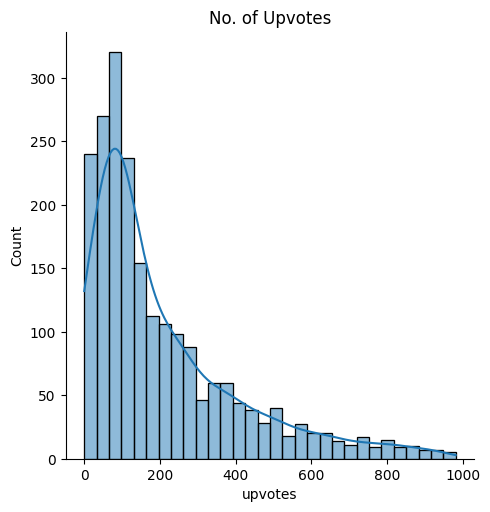

In [20]:
# visualizing a density plot
sns.displot(
    data=wdata,
    x='upvotes',
    kde=True
)
plt.title("No. of Upvotes")
plt.show()

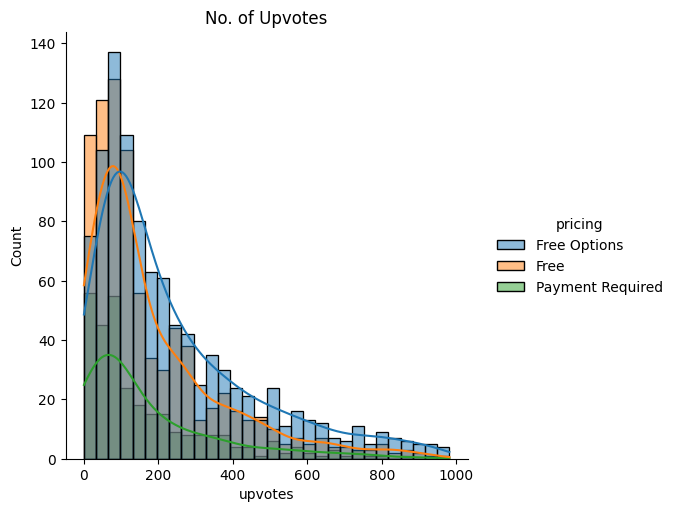

In [22]:
# visualizing a density plot with pricing category
sns.displot(
    data=wdata,
    x='upvotes',
    kde=True,
    hue='pricing'
)
plt.title("No. of Upvotes")
plt.show()

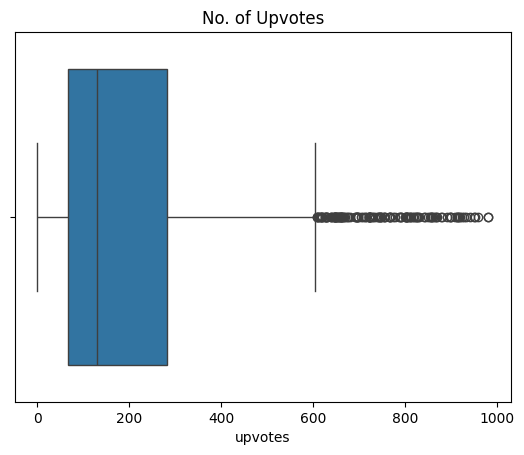

In [23]:
# visualizing box plot

sns.boxplot(
    wdata,
    x='upvotes'
)

plt.title("No. of Upvotes")

plt.show()

**Observations:**
- There are many outliers in the dataset, using the boxplot we can see, 50% of the products get less than 200 upvotes and 75% of the products get less than 300 upvotes.
- The distribution of no. of upvotes is also left-skwed.

**Action:**
- Products with extereme upvotes, can be biased hence, we will trim the data using the upper limit.

In [25]:
# calculating the inter quartile range
Q1 = wdata['upvotes'].quantile(.25)
Q3 = wdata['upvotes'].quantile(.75)

IQR = Q3 - Q1

In [26]:
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)

In [27]:
new_data = wdata.loc[wdata['upvotes'] < upper_limit]

In [28]:
new_data.describe()

,upvotes,reviews,comments,day_rank,week_rank,rating,num_topics
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,169.081663,11.645792,52.219940,8.716433,60.304609,2.415782,2.768537
std,145.022532,57.265878,72.101288,5.395138,41.673277,2.433932,0.571269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,0.000000,14.750000,4.000000,28.000000,0.000000,3.000000
50%,119.000000,1.000000,30.000000,9.000000,57.000000,1.000000,3.000000
75%,249.000000,3.000000,65.000000,13.000000,88.000000,5.000000,3.000000
max,603.000000,997.000000,972.000000,20.000000,210.000000,5.000000,3.000000


In [29]:
new_data.loc[
    new_data['reviews'] > 600
].shape

(6, 13)

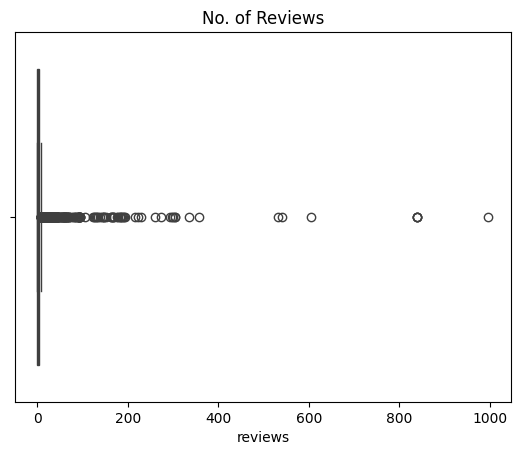

In [30]:
# visualizing box plot for number of reviews

sns.boxplot(
    data=new_data,
    x='reviews'
)

plt.title("No. of Reviews")
plt.show()

**Observations:**
- The extereme values might be an indication of biased reviews for some products. This is usually not the case in-general for products launched.

**Action:**
- Trimming the outliers

In [31]:
Q1 = new_data['reviews'].quantile(.25)
Q3 = new_data['reviews'].quantile(.75)
IQR = abs(Q3 - Q1)
upper_limit = Q3 + 1.5*(IQR)
lower_limit = Q1 - 1.5*(IQR)

In [32]:
clean_data = new_data.loc[
    (new_data['reviews'] < upper_limit)
]

In [33]:
clean_data.describe()

,upvotes,reviews,comments,day_rank,week_rank,rating,num_topics
count,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.00000
mean,154.624181,0.979154,41.965456,8.944014,63.772484,1.962478,2.74866
std,136.010244,1.610134,49.337180,5.463212,42.743540,2.392215,0.59494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,61.500000,0.000000,13.000000,5.000000,31.000000,0.000000,3.00000
50%,108.000000,0.000000,27.000000,9.000000,62.000000,0.000000,3.00000
75%,220.000000,1.000000,54.000000,13.000000,92.000000,5.000000,3.00000
max,603.000000,7.000000,693.000000,20.000000,210.000000,5.000000,3.00000


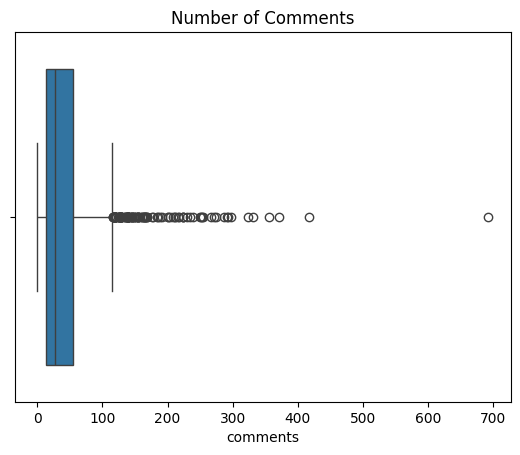

In [34]:
# visualizing box plot of number of comments

sns.boxplot(
    data=clean_data,
    x='comments'
)

plt.title("Number of Comments")
plt.show()

**Observations:**
- There is 1 outlier present in the data with number of comments around 700.

**Action:**
- Trim the outlier

In [35]:
Q1 = clean_data['comments'].quantile(.25)
Q3 = clean_data['comments'].quantile(.75)
IQR = abs(Q3 - Q1)
upper_limit = Q3 + 1.5*(IQR)
lower_limit = Q1 - 1.5*(IQR)

In [36]:
upper_limit

115.5

In [37]:
final_data = clean_data.loc[
    clean_data['comments'] < upper_limit
]
final_data.shape

(1562, 13)

In [39]:
pricing_counts = final_data['pricing'].value_counts()
pricing_counts

pricing
Free Options        679
Free                633
Payment Required    250
Name: count, dtype: int64

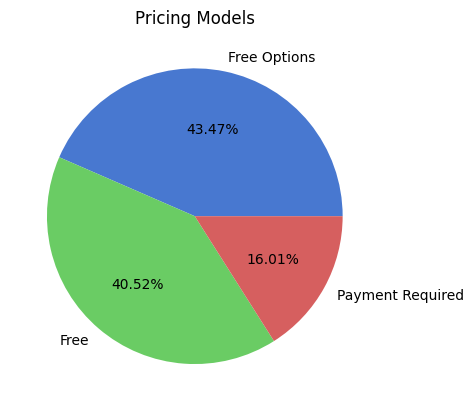

In [40]:
# visualizing the pricing models used
palette_color = sns.color_palette('muted6')
plt.pie(
    x=pricing_counts,
    autopct="%1.2f%%",
    colors=palette_color,
    labels=['Free Options', 'Free', 'Payment Required']
)
plt.title("Pricing Models")
plt.show()

**Observations:**
- Mostly products launched on Product Hunt offer `Free` and `Free Options` pricing models.

In [41]:
topic_counts = final_data['num_topics'].value_counts()
topic_counts

num_topics
3    1280
2     180
1      86
0      16
Name: count, dtype: int64

**Note**: Number of topics cannot be 0, it is necessary to provide atleast 1 topic, hence this is due to issue in data collection. Hence we can remove these products.

In [43]:
final_data = final_data.loc[
    final_data['num_topics'] != 0
]

In [44]:
topic_counts = final_data['num_topics'].value_counts()
topic_counts

num_topics
3    1280
2     180
1      86
Name: count, dtype: int64

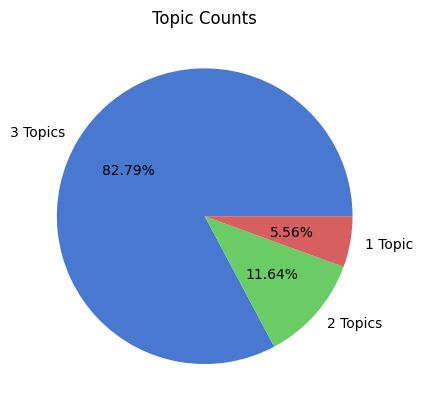

In [45]:
# topics percentage visualization

palette_color = sns.color_palette('muted6')
plt.pie(
    x=topic_counts,
    autopct="%1.2f%%",
    colors=palette_color,
    labels=['3 Topics', '2 Topics', '1 Topic']
)
plt.title("Topic Counts")
plt.show()

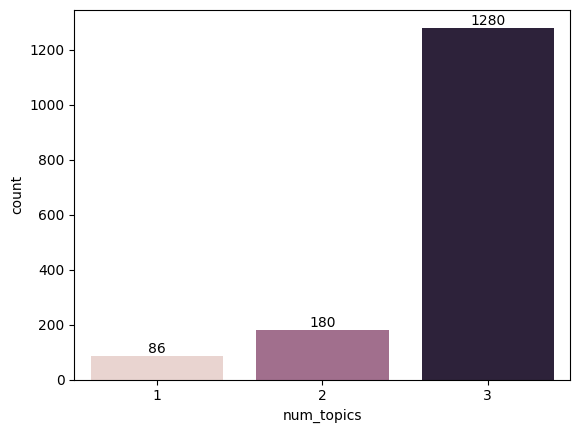

In [46]:
topic_counts = topic_counts.reset_index()
bar_plot(
    data=topic_counts,
    x='num_topics',
    y='count',
    hue='num_topics',
    legend=None
)

In [47]:
prods_3_topics = final_data.loc[
    final_data['num_topics'] == 3
]

prods_2_topics = final_data.loc[
    final_data['num_topics'] == 2
]

prods_1_topics = final_data.loc[
    final_data['num_topics'] == 1
]

In [49]:
prods_3_topics['upvotes'].mean()

142.759375

In [50]:
prods_2_topics['upvotes'].mean()

131.39444444444445

In [51]:
prods_1_topics['upvotes'].mean()

110.38372093023256

**Observations:**
- Mostly products, almost 80% product, have utilized all 3 topic options when launching the product. This can be due to getting better visibility and higher reach on Product Hunt.
- On Average products using all 3 topic optins have more upvotes

In [52]:
day_counts = final_data['day'].value_counts()
day_counts = day_counts.reset_index()

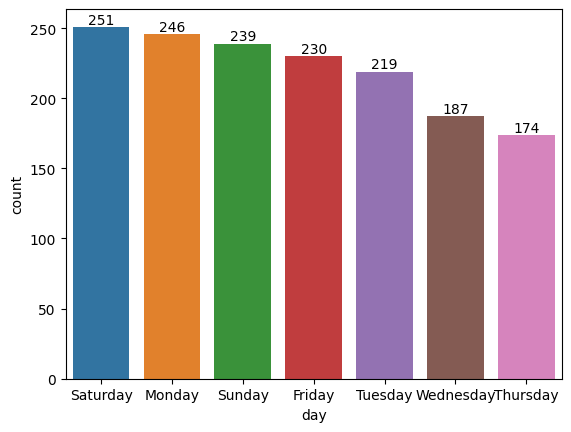

In [53]:
bar_plot(
    data=day_counts, 
    x='day', 
    y='count',
    hue='day',
    legend=None
    )

**Observations:**
- Mostly products are launched on `Saturday`, `Monday` and `Sunday`, while `Wednesday`, `Thursday` and  are very less crowded.
- `Wednesday` and `Thursday` can help us avoid getting into competition with other products.

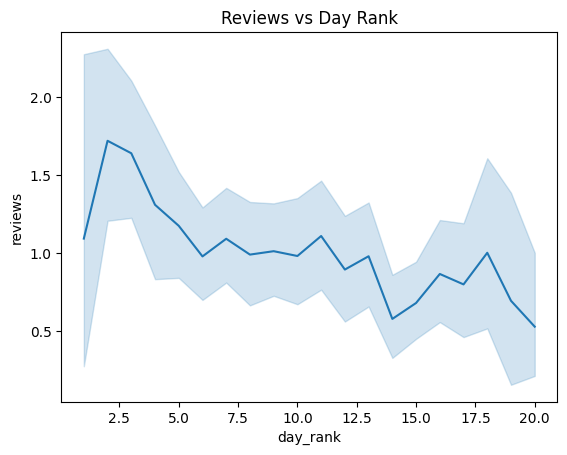

In [56]:
# visualizing reviews vs day rank

sns.lineplot(
    data=final_data.loc[final_data['day_rank'] > 0],
    x='day_rank',
    y='reviews'
)
plt.ylim = final_data['reviews'].max()
plt.title("Reviews vs Day Rank")
plt.show()

**Observations:**
- We are able to observe, less number of reviews, makes your product rank lower during the day.
- Aim should be to acquire more number of `reviews` for the product.

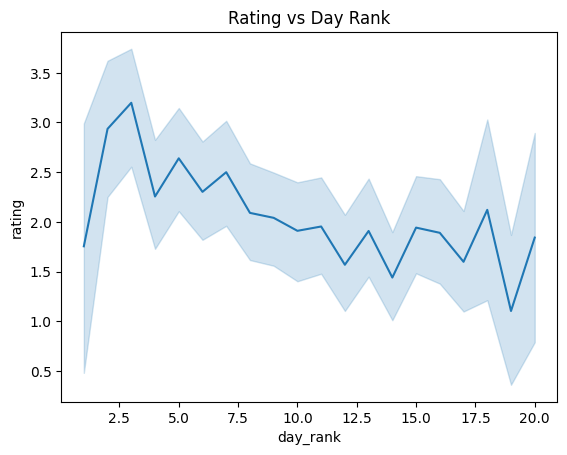

In [57]:
sns.lineplot(
    data=final_data.loc[final_data['day_rank'] > 0],
    x='day_rank',
    y='rating'
)
plt.ylim = final_data['day_rank'].max()
plt.title("Rating vs Day Rank")
plt.show()

**Observations:**
- We are able to observe, less rating, makes your product rank lower during the day.
- Aim should be to acquire higher `rating` for the product.

In [58]:
# products in top 10 products of the day
top_10_list = final_data.loc[
    (final_data['day_rank'] > 0) &
    (final_data['day_rank'] <= 10)
]
top_10_list.shape

(710, 13)

In [60]:
# products in top 5 products of the day
top_5_list = final_data.loc[
    (final_data['day_rank'] > 0) &
    (final_data['day_rank'] <= 5)
]
top_5_list.shape

(254, 13)

In [61]:
# products in #1 product of the day
top_1_list = final_data.loc[
    final_data['day_rank'] == 1
]
top_1_list.shape

(11, 13)

In [62]:
products_count = pd.DataFrame(
    [top_1_list.shape[0], top_5_list.shape[0], top_10_list.shape[0]], 
    index=['#1', "#5", "#10"], 
    columns=['Counts'])

In [63]:
products_count

,Counts
#1,11
#5,254
#10,710


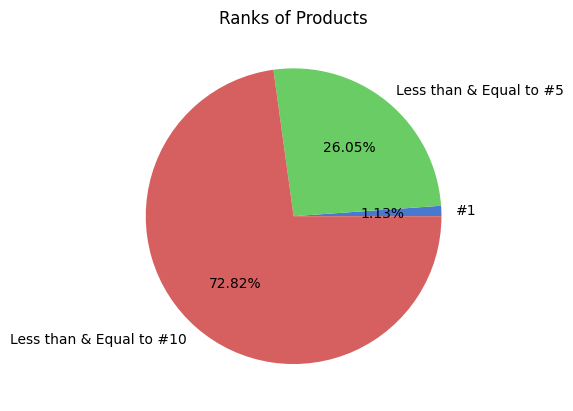

In [64]:
# visualizing the quantity of above 3 types of products

palette_color = sns.color_palette('muted6')
plt.pie(
    data=products_count,
    x='Counts',
    autopct="%1.2f%%",
    colors=palette_color,
    labels=['#1', "Less than & Equal to #5", "Less than & Equal to #10"]
)
plt.title("Ranks of Products")
plt.show()

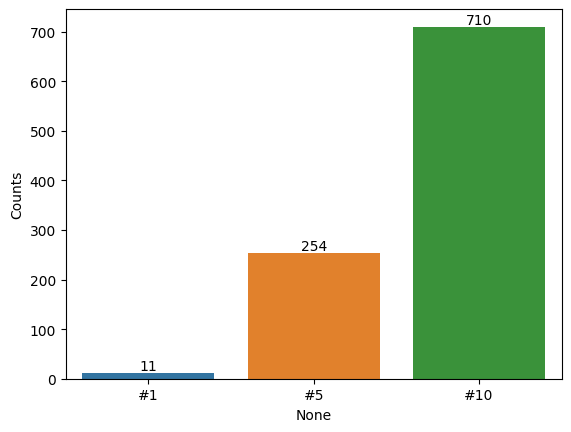

In [65]:
# visualizing using histogram

bar_plot(
    data=products_count, 
    x=products_count.index, 
    hue=products_count.index, 
    legend=False, 
    y='Counts'
    )

Top 10 Products of the day list

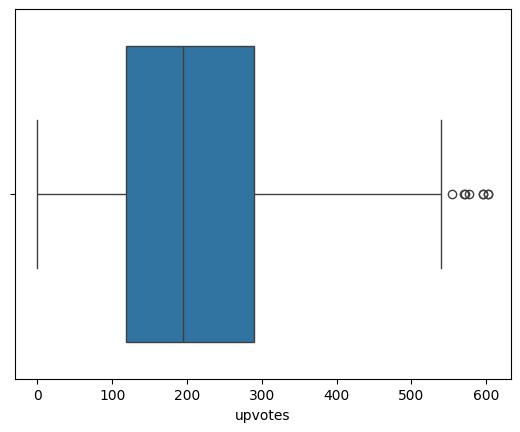

In [66]:
sns.boxplot(
    data=top_10_list,
    x='upvotes'
)
plt.show()

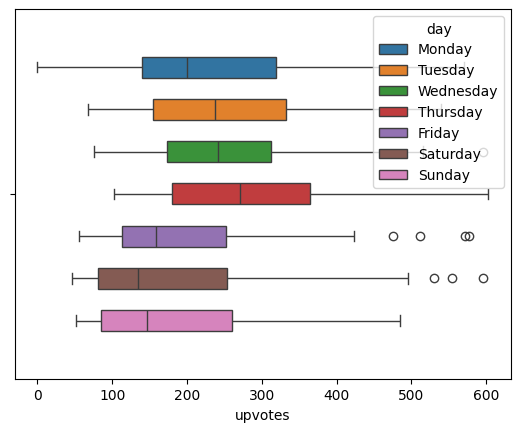

In [67]:
sns.boxplot(
    data=top_10_list,
    x='upvotes',
    hue='day',
    gap=.5
)
plt.show()

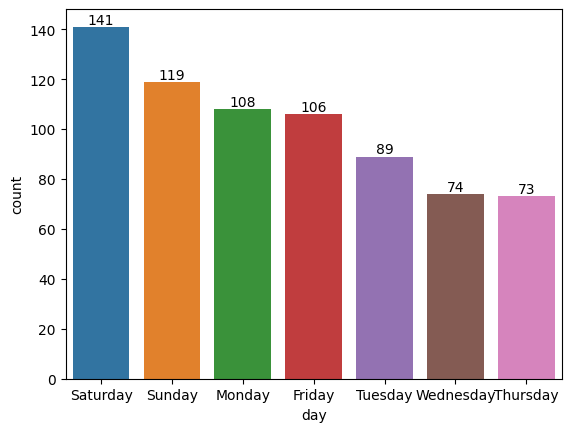

In [68]:
day_counts = top_10_list['day'].value_counts()
day_counts = day_counts.reset_index()

bar_plot(data=day_counts, x='day', y='count', hue='day', legend=None)

In [104]:
top_10_list['upvotes'].mean()

314.255033557047

In [105]:
# #10 products launched on friday
fri_top_10_list = top_10_list.loc[
    top_10_list['day'] == 5
]
fri_top_10_list.shape
fri_top_10_list['upvotes'].mean()

(37, 9)

In [107]:
# #10 products launched on tuesday
tue_top_10_list = top_10_list.loc[
    top_10_list['day'] == 2
]
tue_top_10_list.shape
tue_top_10_list['upvotes'].mean()

356.58

In [108]:
# #10 products launched on tuesday
mon_top_10_list = top_10_list.loc[
    top_10_list['day'] == 1
]
mon_top_10_list.shape
mon_top_10_list['upvotes'].mean()

330.16

In [109]:
# #10 products launched on sunday
sun_top_10_list = top_10_list.loc[
    top_10_list['day'] == 0
]
sun_top_10_list.shape
sun_top_10_list['upvotes'].mean()

348.86

In [111]:
avg_sun_mon_tue = (sun_top_10_list['upvotes'].mean() + mon_top_10_list['upvotes'].mean() + tue_top_10_list['upvotes'].mean()) / 3
avg_sun_mon_tue

345.2

**Observations:**
- The average no. of upvotes for procuts in top 10 products of the day dataframe is `314`.
- For products launched on **Friday** on average required less number of upvotes (approx 232) to get in the top 10 products of the day list with **minimal competition**.
- Products launched on **Monday**, **Tuesday** and **Wednesday** on average required more number of upvotes (approx 348) to get into top 10 products of the day.


In [113]:
top_10_pricing = top_10_list['pricing'].value_counts().reset_index()
top_10_pricing

,pricing,count
0,1,145
1,0,121
2,2,32
